In [1]:
import pandas as pd
import requests
import json
from pprint import pprint
from api_keys import nasdaq_key

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as dt
import scipy.stats as sp
import dataframe_image as dfi



In [3]:
#get table to see region data
#region code 102001 is for ALL of USA
#region type can change to city/metro/or region code. use metro to get region codes.

table_code = "ZILLOW/REGIONS"
region_type = "metro"
format ="json"
request_url = f"https://data.nasdaq.com/api/v3/datatables/{table_code}.{format}?region_type={region_type}&api_key={nasdaq_key}"
starting_data = requests.get(request_url).json()
pprint(starting_data)

{'datatable': {'columns': [{'name': 'region_id', 'type': 'text'},
                           {'name': 'region_type', 'type': 'text'},
                           {'name': 'region', 'type': 'text'}],
               'data': [['845172', 'metro', 'Winfield, KS; KS'],
                        ['845171', 'metro', 'Union, SC; SC'],
                        ['845170', 'metro', 'Scottsburg, IN; IN'],
                        ['845169', 'metro', 'Rockport, TX; TX'],
                        ['845168', 'metro', 'Pearsall, TX; TX'],
                        ['845167', 'metro', 'Ottawa, IL; IL'],
                        ['845166', 'metro', 'Mount Gay, WV; WV'],
                        ['845165', 'metro', 'Minden, LA; LA'],
                        ['845164', 'metro', 'Lebanon, NH; NH'],
                        ['845163', 'metro', 'Jasper, AL; AL'],
                        ['845162', 'metro', 'Granbury, TX; TX'],
                        ['845161', 'metro', 'Bluffton, IN; IN'],
                        ['845

In [4]:
# Define a list of cities you want to search for
cities = ['New York', 'Los Angeles', 'Miami', 'St. Louis',
          'Seattle', 'Atlanta', 'Houston', 'Minneapolis']

# create an empty dictionary to store the city data frames
city_dfs = {}
df17s = {}
df20s = {}

# loop through each city in the list and search for the city code
for city_name in cities:
    for row in starting_data['datatable']['data']:
        if city_name in row[2]:
            city_code = row[0]
            break

    # use the city code to query the API and retrieve the data
    url = f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?indicator_id=ZSFH&region_id={city_code}&api_key={nasdaq_key}"
    response = requests.get(url)
    city_data = response.json()

    # create a data frame for the city and clean the data
    city_df = pd.DataFrame(city_data['datatable']['data'], columns=['indicator_id', 'region_id', 'date', 'price'])
    city_df['date'] = pd.to_datetime(city_df['date'])
    city_df = city_df.sort_values('date')
    # drop the columns 'indicator_id' and 'region_id'
    city_df = city_df.drop(['indicator_id', 'region_id'], axis=1)
    
    # create df for 2017-2019
    # create a data frame for the city and clean the data
    df17 = pd.DataFrame(city_data['datatable']['data'], columns=['indicator_id', 'region_id', 'date', 'price'])
    df17['date'] = pd.to_datetime(df17['date'])
    df17 = df17.sort_values('date')
    # drop the columns 'indicator_id' and 'region_id'
    df17 = df17.drop(['indicator_id', 'region_id'], axis=1)
    
    # create df for 2020-2022
    # create a data frame for the city and clean the data
    df20 = pd.DataFrame(city_data['datatable']['data'], columns=['indicator_id', 'region_id', 'date', 'price'])
    df20['date'] = pd.to_datetime(city_df['date'])
    df20 = df20.sort_values('date')
    # drop the columns 'indicator_id' and 'region_id'
    df20 = df20.drop(['indicator_id', 'region_id'], axis=1)

    city_dfs[city_name] = city_df
    df17s [city_name] = df17
    df20s [city_name] = df20

#clean data down to data range for sample
for city_name, city_df in city_dfs.items():
    city_dfs[city_name] = city_df[(city_df['date'] >= '2017-01-31') & (city_df['date'] <= '2022-12-31')]
    
for city_name, df17 in df17s.items():
    df17s[city_name] = df17[(df17['date'] >= '2017-01-31') & (df17['date'] <= '2019-12-31')]    
    
for city_name, df20 in df20s.items():
    df20s[city_name] = df20[(df20['date'] >= '2020-01-31') & (df20['date'] <= '2022-12-31')]       

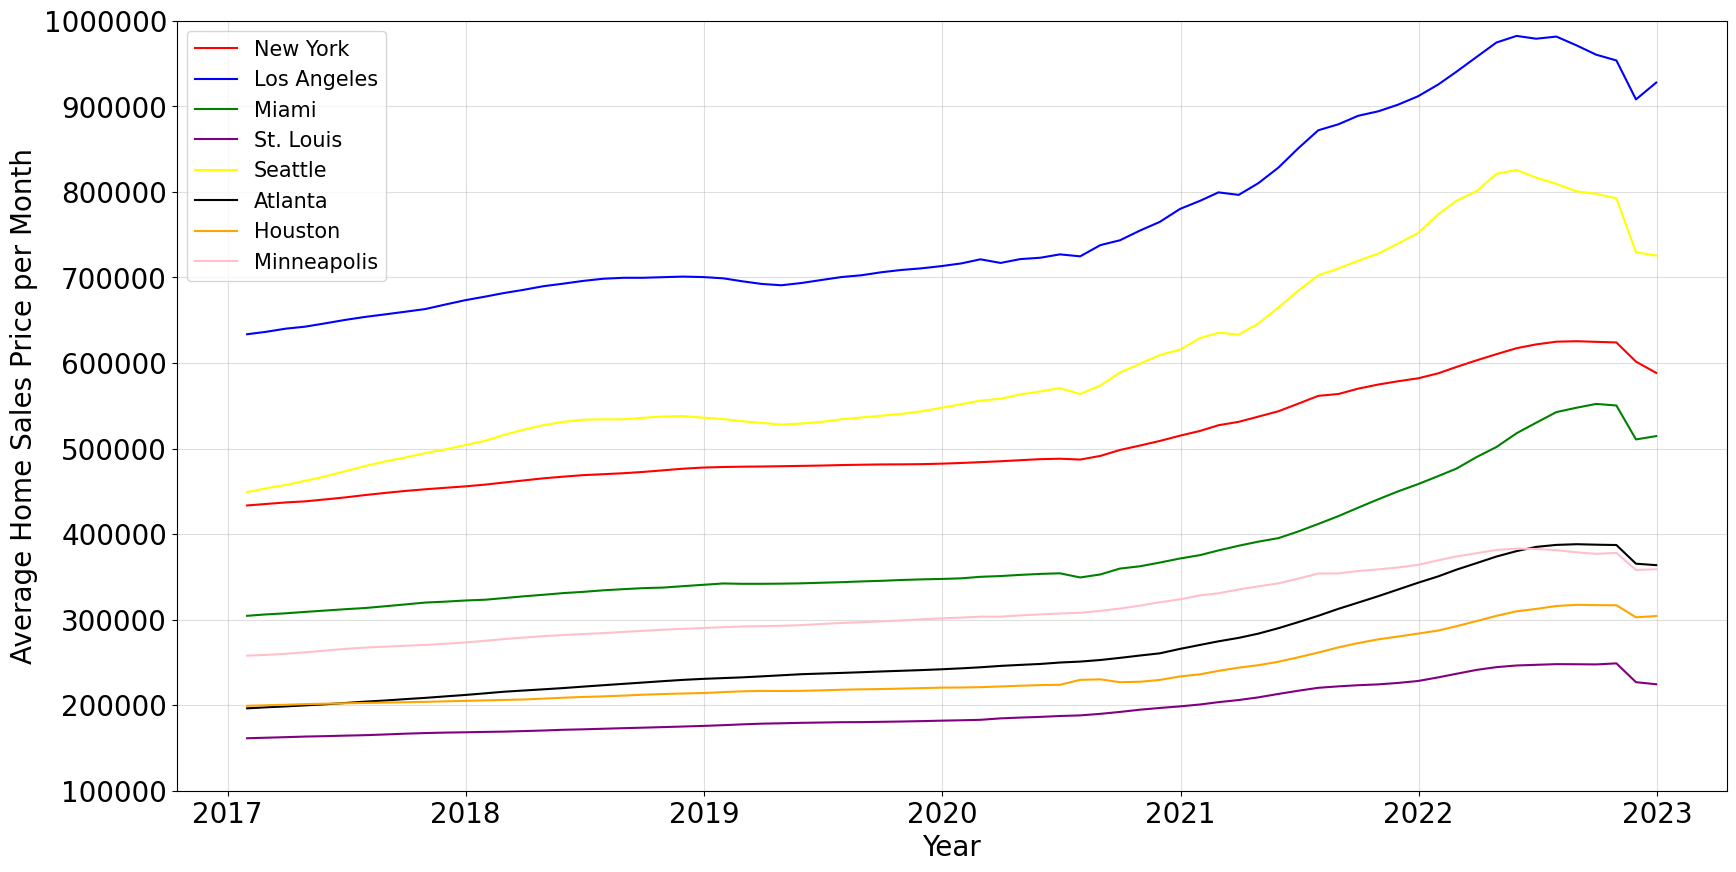

In [40]:
# plots all cities at one time for 2017 - 2022



cities = ['New York', 'Los Angeles', 'Miami', 'St. Louis',
          'Seattle', 'Atlanta', 'Houston', 'Minneapolis']


plt.figure(figsize=(20,10))


plt.plot(city_dfs["New York"]["date"],city_dfs["New York"]["price"],color='red')
plt.plot(city_dfs["Los Angeles"]["date"],city_dfs["Los Angeles"]["price"],color='blue')
plt.plot(city_dfs["Miami"]["date"],city_dfs["Miami"]["price"],color='green')
plt.plot(city_dfs["St. Louis"]["date"],city_dfs["St. Louis"]["price"],color='purple')
plt.plot(city_dfs["Seattle"]["date"],city_dfs["Seattle"]["price"],color='yellow')
plt.plot(city_dfs["Atlanta"]["date"],city_dfs["Atlanta"]["price"],color='black')
plt.plot(city_dfs["Houston"]["date"],city_dfs["Houston"]["price"],color='orange')
plt.plot(city_dfs["Minneapolis"]["date"],city_dfs["Minneapolis"]["price"],color='pink')


##############################################################
plt.legend(cities, fontsize = 15)
plt.grid(alpha=0.4)
plt.xticks(fontsize=20,rotation=0)
plt.yticks(fontsize=20)
##############################################################
plt.ylim([100000 , 1000000])
plt.ticklabel_format(style='plain', useOffset=False, axis='y')


plt.ylabel("Average Home Sale Price per Month",fontsize=20)
plt.xlabel("Year", fontsize = 20)

plt.savefig(f'output/city_overlay.png')

plt.show;

2017-2019: slope = 610.4020592020591
2020-2022: slope = 2059.4551614491374


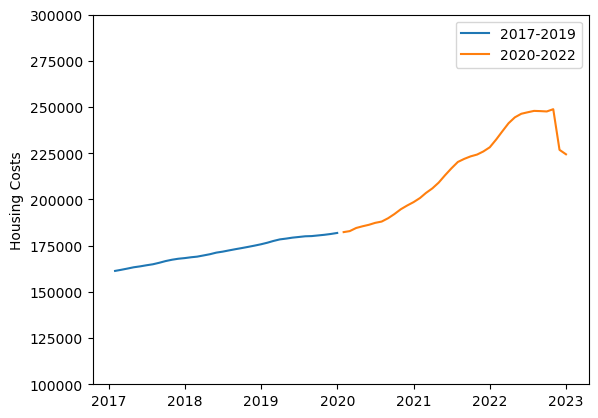

In [6]:
# calculate linear regression 2017-2019
y = np.array(df17s['St. Louis']['price'].values, dtype=float)
x = np.array(range(0,36), dtype=float)
slope1, intercept, r_value, p_value, std_err = sp.linregress(x,y)


# calculate linerar regression 2020-2022
y = np.array(df20s['St. Louis']['price'].values, dtype=float)
x = np.array(range(0,36), dtype=float)
slope2, intercept, r_value, p_value, std_err = sp.linregress(x,y)


             
# Create a figure and axis object
fig, ax = plt.subplots()



# Set the y-axis label
ax.set_ylabel('Housing Costs')
# Plot the data for 2018-2020 on one line
data1 = df17s["St. Louis"]['price']
ax.plot(df17s["St. Louis"]['date'], data1, label='2017-2019')
# Plot the data for 2021-2023 on another line
data2 = df20s["St. Louis"]['price']
ax.plot(df20s["St. Louis"]['date'], data2, label='2020-2022')
# Add a legend to the plot
ax.legend()


plt.ylim([100000 , 300000])

print(f'2017-2019: slope = {slope1}')
print(f'2020-2022: slope = {slope2}')

# Show the plot
plt.show()

In [53]:
# function to plot all cities individually at the same time
def plotter():
    
    for city in cities:
        # calculate linear regression 2017-2019
        y = np.array(df17s[city]['price'].values, dtype=float)
        x = np.array(range(0,36), dtype=float)
        slope1, intercept, r_value, p_value, std_err = sp.linregress(x,y)


        # calculate linerar regression 2020-2022
        y = np.array(df20s[city]['price'].values, dtype=float)
        x = np.array(range(0,36), dtype=float)
        slope2, intercept, r_value, p_value, std_err = sp.linregress(x,y)



        # Create a figure and axis object
        fig, ax = plt.subplots()



        # Set the y-axis label
        ax.set_ylabel("Average Home Sale Price per Month")
        
        # Set the x-axis label
        ax.set_xlabel("Year")
        
        # Plot the data for 2018-2020 on one line
        data1 = df17s[city]['price']
        ax.plot(df17s[city]['date'], data1, label='2017-2019')
        # Plot the data for 2021-2023 on another line
        data2 = df20s[city]['price']
        ax.plot(df20s[city]['date'], data2, label='2020-2022')
        # Add a legend to the plot
        ax.legend()
        # add city name to plot title
        plt.title(f'{city}')


        #plt.ylim([ylim1 , ylim2])
        ax = plt.gca()

        # recompute the ax.dataLim
        ax.relim()
        # update ax.viewLim using the new dataLim
        ax.autoscale_view()
        plt.draw()
        plt.savefig(f'output/Fig_{city}.png')
        
        ###########################
        plt.grid(alpha=0.4)
        

        print(f'{city} 2017-2019: slope = {slope1}')
        print(f'{city} 2020-2022: slope = {slope2}')
       

        # Show the plot
        plt.show()
        
        print('---------------------------------------------------------------------------------')

New York 2017-2019: slope = 1485.2142857142858
New York 2020-2022: slope = 4698.180518946601


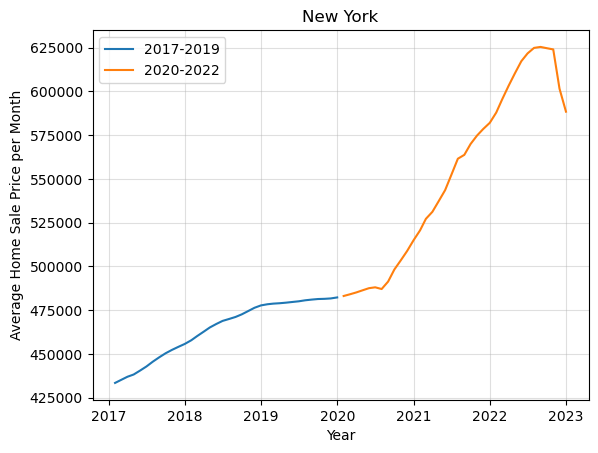

---------------------------------------------------------------------------------
Los Angeles 2017-2019: slope = 2081.4166023166026
Los Angeles 2020-2022: slope = 8721.254914383915


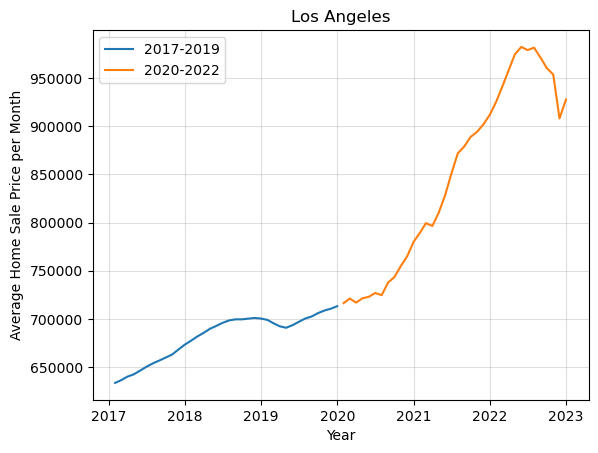

---------------------------------------------------------------------------------
Miami 2017-2019: slope = 1277.0451737451738
Miami 2020-2022: slope = 6517.767655426074


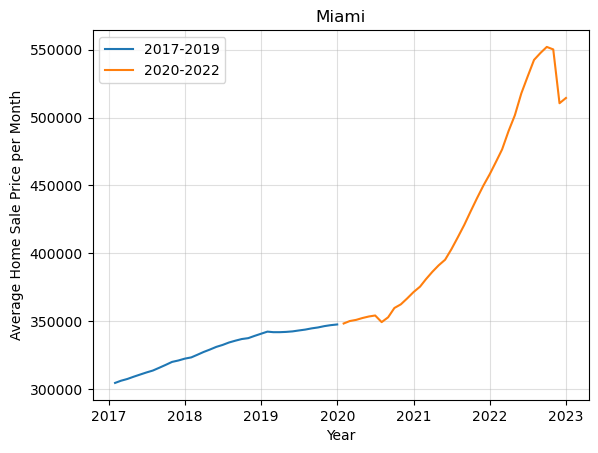

---------------------------------------------------------------------------------
St. Louis 2017-2019: slope = 610.4020592020591
St. Louis 2020-2022: slope = 2059.4551614491374


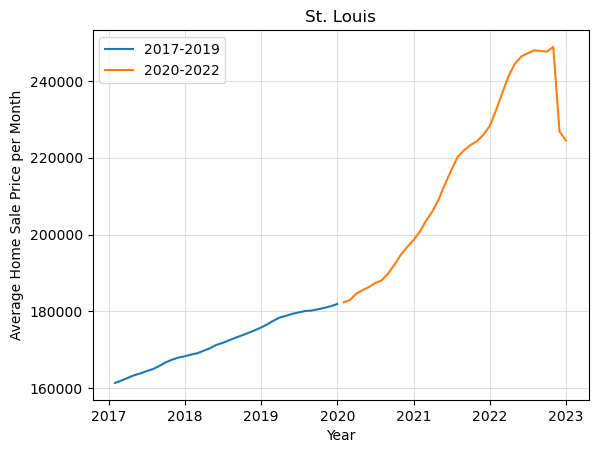

---------------------------------------------------------------------------------
Seattle 2017-2019: slope = 2519.505405405405
Seattle 2020-2022: slope = 8408.451188971154


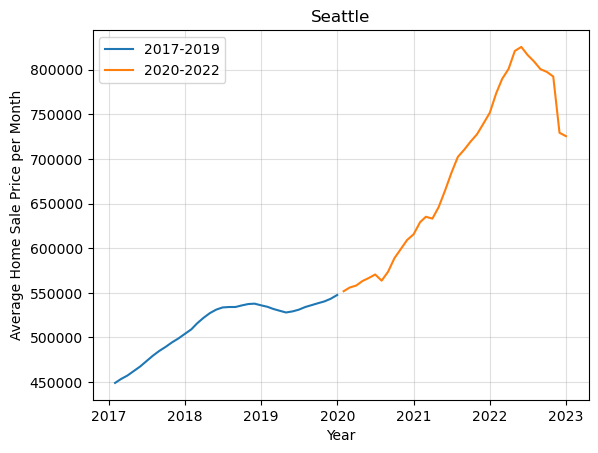

---------------------------------------------------------------------------------
Atlanta 2017-2019: slope = 1384.3447876447879
Atlanta 2020-2022: slope = 4921.638418167936


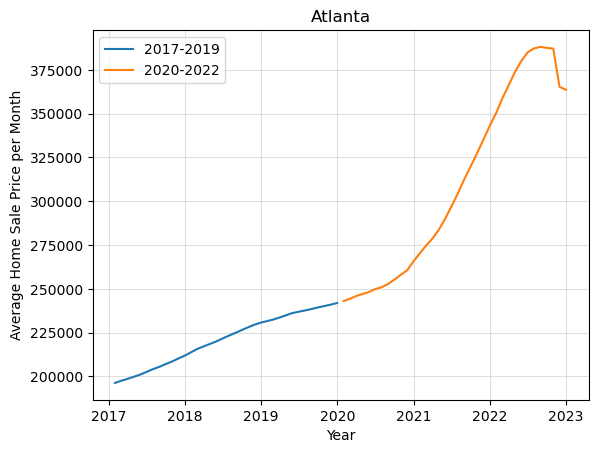

---------------------------------------------------------------------------------
Houston 2017-2019: slope = 642.7184041184042
Houston 2020-2022: slope = 3259.759815593139


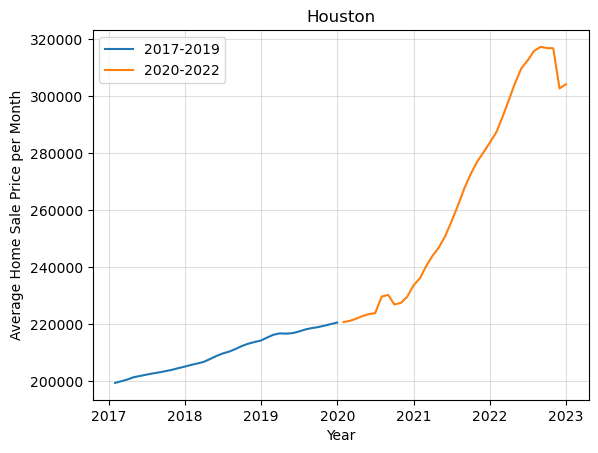

---------------------------------------------------------------------------------
Minneapolis 2017-2019: slope = 1248.9532818532823
Minneapolis 2020-2022: slope = 2564.6863573077003


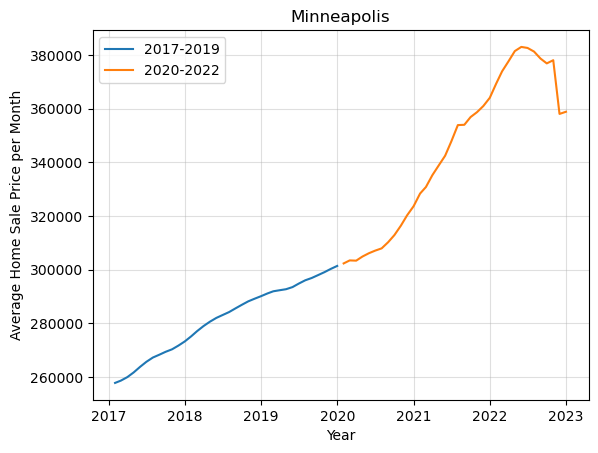

---------------------------------------------------------------------------------


In [54]:
plotter()

In [9]:
table_code = "ZILLOW/REGIONS"
region_type = "metro"
format ="json"
request_url = f"https://data.nasdaq.com/api/v3/datatables/{table_code}.{format}?region_type={region_type}&api_key={nasdaq_key}"
starting_data = requests.get(request_url).json()
pprint(starting_data)

{'datatable': {'columns': [{'name': 'region_id', 'type': 'text'},
                           {'name': 'region_type', 'type': 'text'},
                           {'name': 'region', 'type': 'text'}],
               'data': [['845172', 'metro', 'Winfield, KS; KS'],
                        ['845171', 'metro', 'Union, SC; SC'],
                        ['845170', 'metro', 'Scottsburg, IN; IN'],
                        ['845169', 'metro', 'Rockport, TX; TX'],
                        ['845168', 'metro', 'Pearsall, TX; TX'],
                        ['845167', 'metro', 'Ottawa, IL; IL'],
                        ['845166', 'metro', 'Mount Gay, WV; WV'],
                        ['845165', 'metro', 'Minden, LA; LA'],
                        ['845164', 'metro', 'Lebanon, NH; NH'],
                        ['845163', 'metro', 'Jasper, AL; AL'],
                        ['845162', 'metro', 'Granbury, TX; TX'],
                        ['845161', 'metro', 'Bluffton, IN; IN'],
                        ['845

In [10]:
cities2 = ['New York', 'Los Angeles', 'Miami', 'St. Louis',
          'Seattle', 'Atlanta', 'Houston', 'Minneapolis', 
          'Chicago', 'Nashville', 'New Orleans', 'Bozeman', 'Boise',
          'Dallas-Fort Worth', 'San Diego', 'Portland', 'Detroit', 
          'Philadelphia', 'Boston', 'Charleston', 'Cincinati',
          'Omaha', 'Las Vegas', "Salt Lake City", 'Denver', 
          'Phoenix', 'Austin', 'Kansas City', 'Tampa', 'Clevland', 'Milwaukee',
          'Charlotte','Washington', 'Las Vegas', 'Albuquerque', 'Baltimore', 'Pittsburgh',
          'Jackson', 'San Antonio'
         ]

# create an empty dictionary to store the city data frames
city_dfs = {}
df17s = {}
df20s = {}

# loop through each city in the list and search for the city code
for city_name in cities2:
    for row in starting_data['datatable']['data']:
        if city_name in row[2]:
            city_code = row[0]
            break

    # use the city code to query the API and retrieve the data
    url = f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?indicator_id=ZSFH&region_id={city_code}&api_key={nasdaq_key}"
    response = requests.get(url)
    city_data = response.json()

    # create a data frame for the city and clean the data
    city_df = pd.DataFrame(city_data['datatable']['data'], columns=['indicator_id', 'region_id', 'date', 'price'])
    city_df['date'] = pd.to_datetime(city_df['date'])
    city_df = city_df.sort_values('date')
    # drop the columns 'indicator_id' and 'region_id'
    city_df = city_df.drop(['indicator_id', 'region_id'], axis=1)
    
    # create df for 2017-2019
    # create a data frame for the city and clean the data
    df17 = pd.DataFrame(city_data['datatable']['data'], columns=['indicator_id', 'region_id', 'date', 'price'])
    df17['date'] = pd.to_datetime(df17['date'])
    df17 = df17.sort_values('date')
    # drop the columns 'indicator_id' and 'region_id'
    df17 = df17.drop(['indicator_id', 'region_id'], axis=1)
    
    # create df for 2020-2022
    # create a data frame for the city and clean the data
    df20 = pd.DataFrame(city_data['datatable']['data'], columns=['indicator_id', 'region_id', 'date', 'price'])
    df20['date'] = pd.to_datetime(city_df['date'])
    df20 = df20.sort_values('date')
    # drop the columns 'indicator_id' and 'region_id'
    df20 = df20.drop(['indicator_id', 'region_id'], axis=1)

    city_dfs[city_name] = city_df
    df17s [city_name] = df17
    df20s [city_name] = df20

#clean data down to data range for sample
for city_name, city_df in city_dfs.items():
    city_dfs[city_name] = city_df[(city_df['date'] >= '2017-01-31') & (city_df['date'] <= '2022-12-31')]
    
for city_name, df17 in df17s.items():
    df17s[city_name] = df17[(df17['date'] >= '2017-01-31') & (df17['date'] <= '2019-12-31')]    
    
for city_name, df20 in df20s.items():
    df20s[city_name] = df20[(df20['date'] >= '2020-01-31') & (df20['date'] <= '2022-12-31')]   

In [11]:
# create empty lists for slopes for a city in each timeframe
slope17_19 = []
slope20_22 = []
    
for city in cities2:

    # calculate linear regression 2017-2019
    y = np.array(df17s[city]['price'].values, dtype=float)
    x = np.array(range(0,36), dtype=float)
    slope1, intercept, r_value, p_value, std_err = sp.linregress(x,y)


    # calculate linerar regression 2020-2022
    y = np.array(df20s[city]['price'].values, dtype=float)
    x = np.array(range(0,36), dtype=float)
    slope2, intercept, r_value, p_value, std_err = sp.linregress(x,y)
    
    slope17_19.append(slope1)
    slope20_22.append(slope2)

In [52]:
# create price_change dataframe to store slope values 
price_change = pd.DataFrame({'City':cities2,
                            'Rate of price change 2017-2019 (dollars/month)':slope17_19,
                             'Rate of price change 2020-2022 (dollars/month)':slope20_22
})

# calculates percent change of rates of price change
percent_change = round(((price_change["Rate of price change 2020-2022 (dollars/month)"] - price_change['Rate of price change 2017-2019 (dollars/month)'])/(price_change['Rate of price change 2017-2019 (dollars/month)']))*100,0)

price_change['Percent Change'] = percent_change

price_change.set_index('City', inplace = True)

price_change

,Rate of price change 2017-2019 (dollars/month),Rate of price change 2020-2022 (dollars/month),Percent Change
City,,,
New York,1485.214286,4698.180519,216.0
Los Angeles,2081.416602,8721.254914,319.0
Miami,1277.045174,6517.767655,410.0
St. Louis,610.402059,2059.455161,237.0
Seattle,2519.505405,8408.451189,234.0
Atlanta,1384.344788,4921.638418,256.0
Houston,642.718404,3259.759816,407.0
Minneapolis,1248.953282,2564.686357,105.0
Chicago,627.269369,2296.414255,266.0


In [59]:
# sort data by Percent Change
price_change = price_change.sort_values(by='Percent Change', ascending = False)
dfi.export(price_change, 'output/price_change.png')

price_change

Unable to enlarge image with Chrome, it is a known bug with version 111 and 112
                    You could try to install an individual Chrome dev version and set chrome_path to it
                    or try 'df.dfi.export('df.png', table_conversion="selenium")'


,Rate of price change 2017-2019 (dollars/month),Rate of price change 2020-2022 (dollars/month),Percent Change
City,,,
New Orleans,252.035521,1826.642890,625.0
Austin,1145.964865,8112.007108,608.0
San Antonio,774.239382,4442.802201,474.0
San Diego,1927.749807,10423.248916,441.0
Cincinati,976.909138,5011.793486,413.0
Charleston,976.909138,5011.793486,413.0
Miami,1277.045174,6517.767655,410.0
Houston,642.718404,3259.759816,407.0
Baltimore,546.234106,2542.468318,365.0


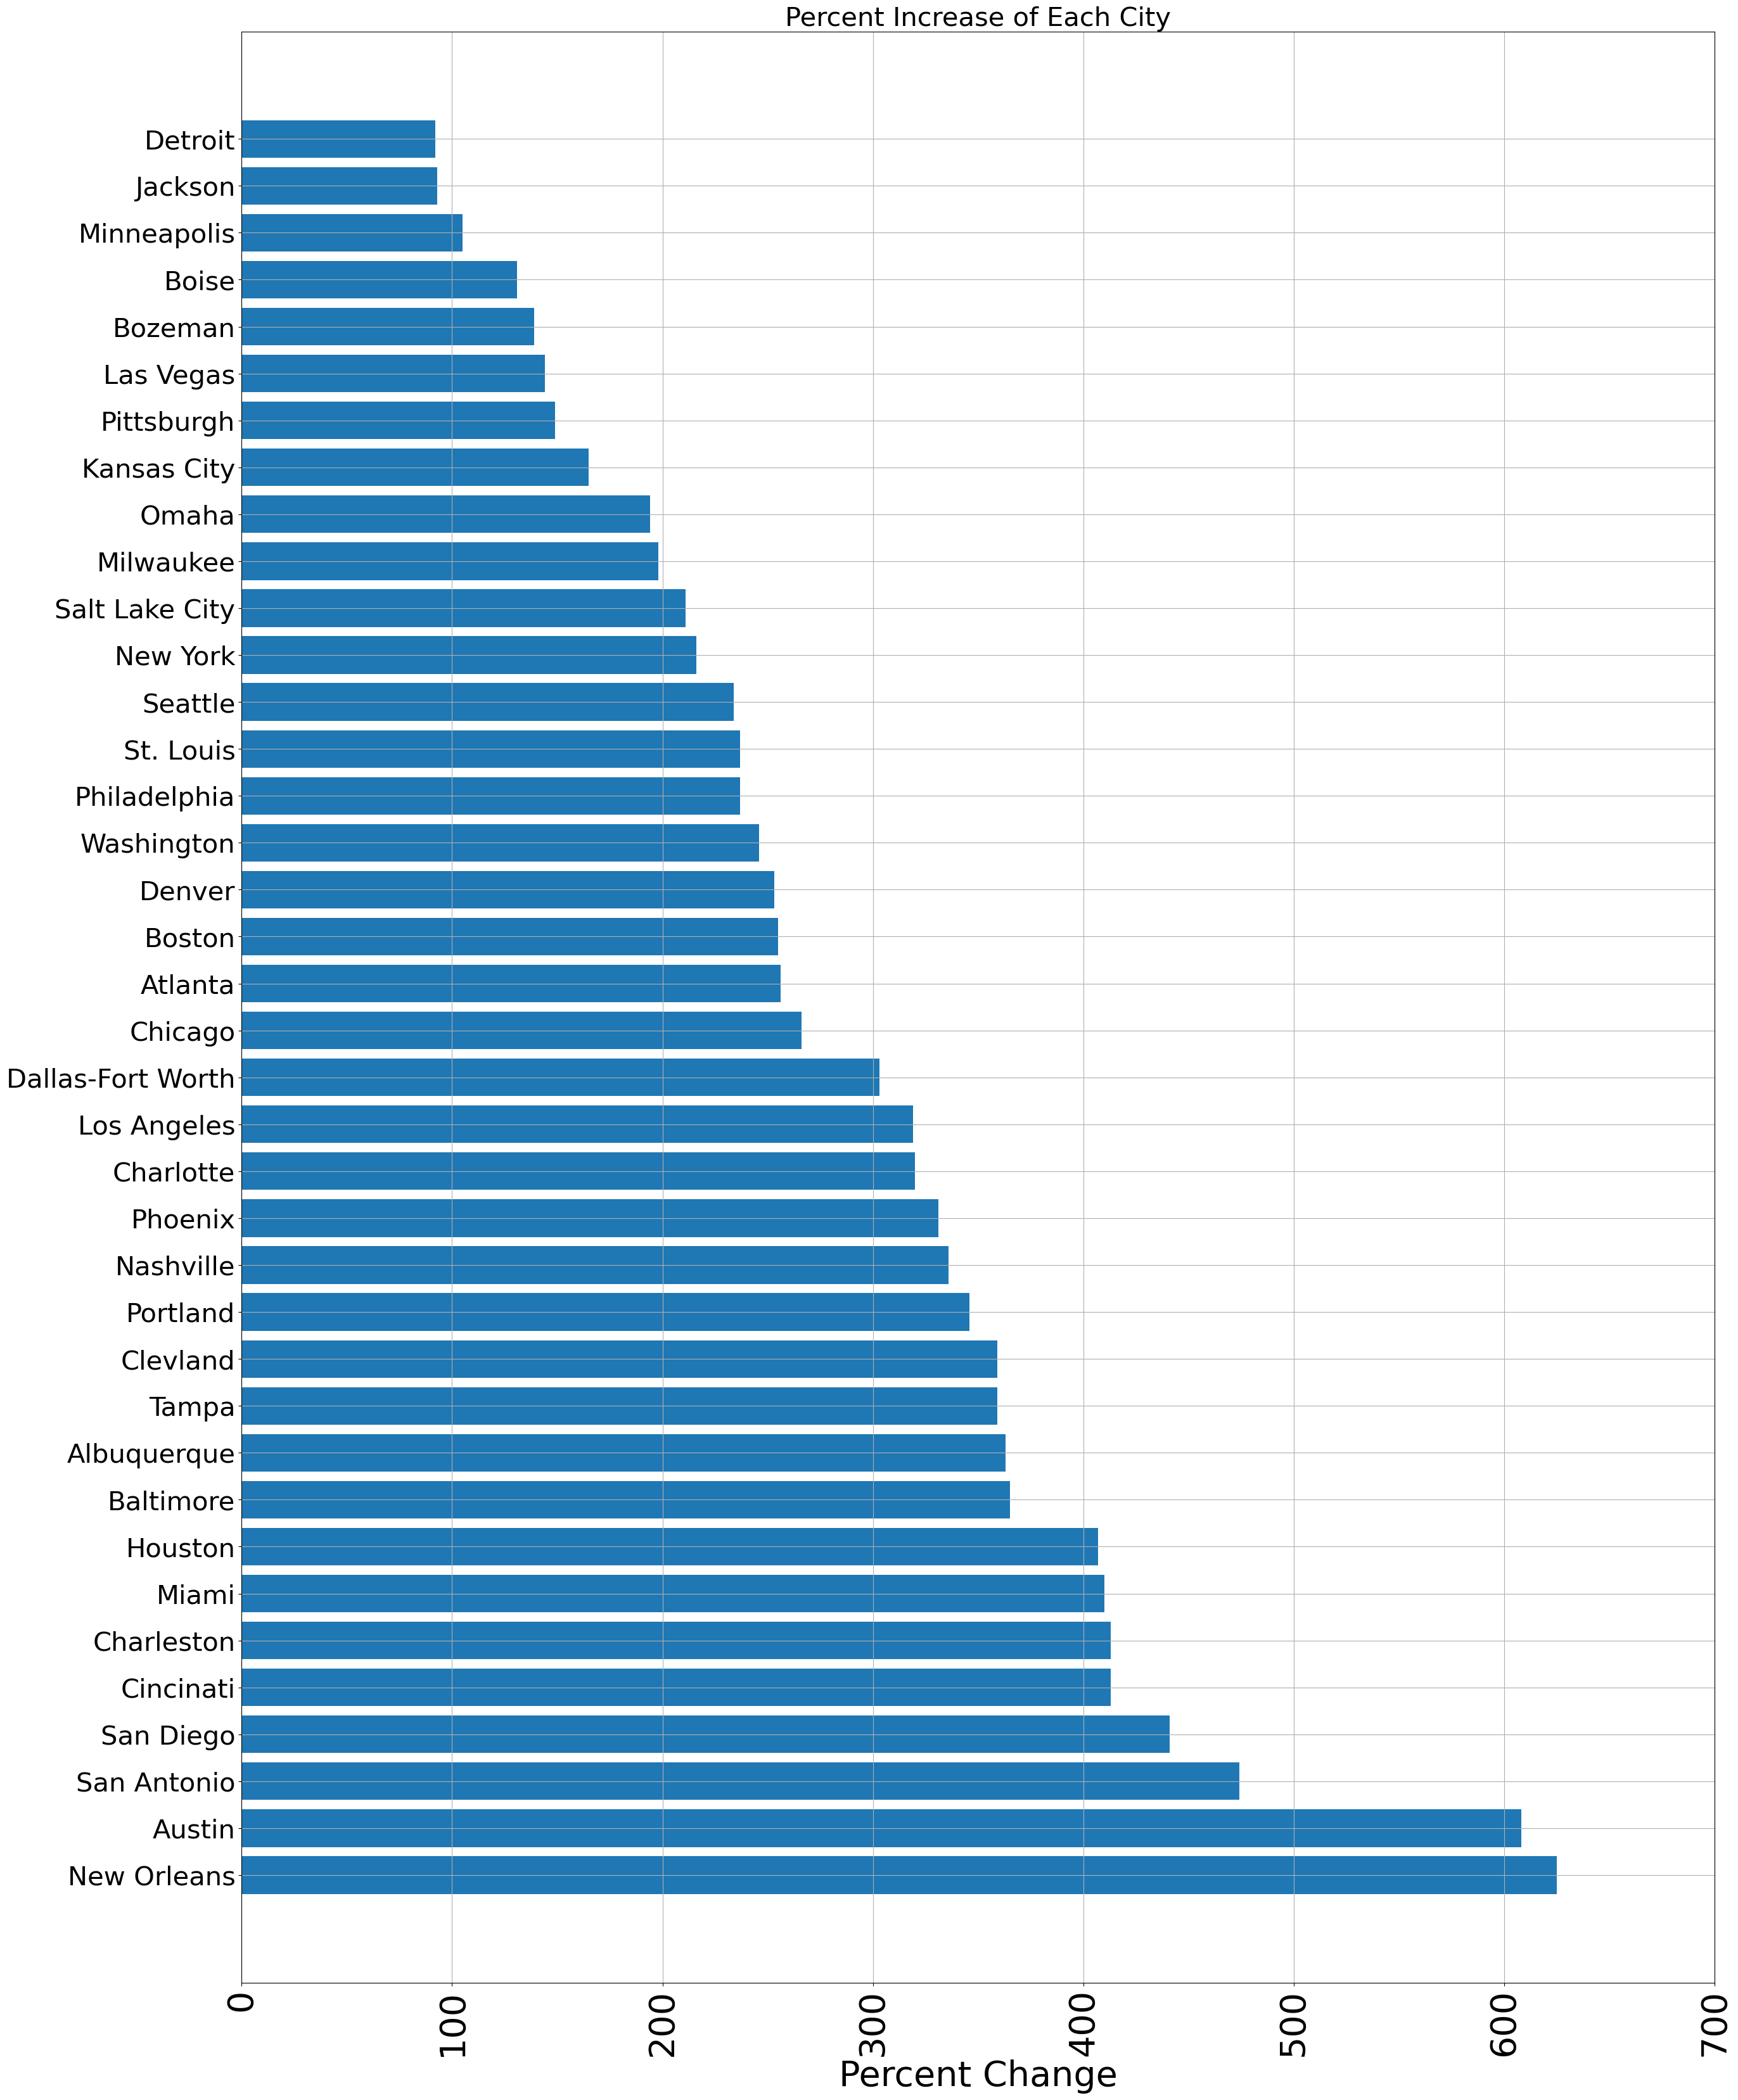

In [60]:
plt.barh(price_change.index, price_change['Percent Change'])

plt.ylabel('',fontsize =45)
plt.xlabel('Percent Change',fontsize = 40)
plt.xticks(fontsize=40, rotation=90)
plt.yticks(fontsize = 30)

plt.xlim([0, 700])

fig = plt.gcf()
fig.set_size_inches(30, 40)


plt.grid()
plt.title("Percent Increase of Each City",fontsize=30)

plt.savefig(f'output/percent_change_bar.png')

plt.show()

In [21]:
mean = price_change['Percent Change'].mean()
median = price_change['Percent Change'].median()
print(f'mean = {mean}')
print(f'median = {median}')

mean = 286.0769230769231
median = 256.0


mean = 286.0769230769231
median = 256.0


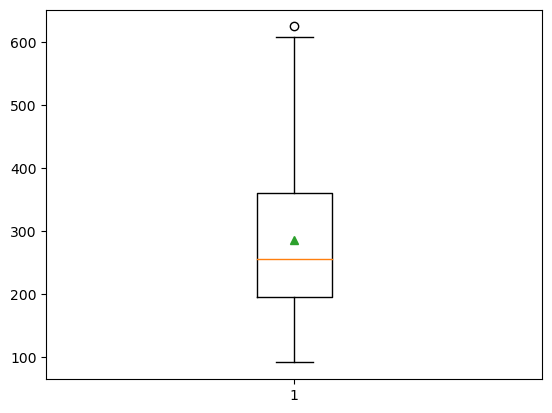

In [22]:
mean = price_change['Percent Change'].mean()
median = price_change['Percent Change'].median()
print(f'mean = {mean}')
print(f'median = {median}')

plt.boxplot(price_change['Percent Change'],showmeans=True);
plt.savefig(f'output/box_plot.png')
